In [194]:
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pdb
import cv2
from AutoAugment.autoaugment import ImageNetPolicy, CIFAR10Policy, SVHNPolicy, SubPolicy
from glob import glob

real_islets_resized/1.tif
<PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=105x103 at 0x2901A026FD0>
['posterize' 'posterize']


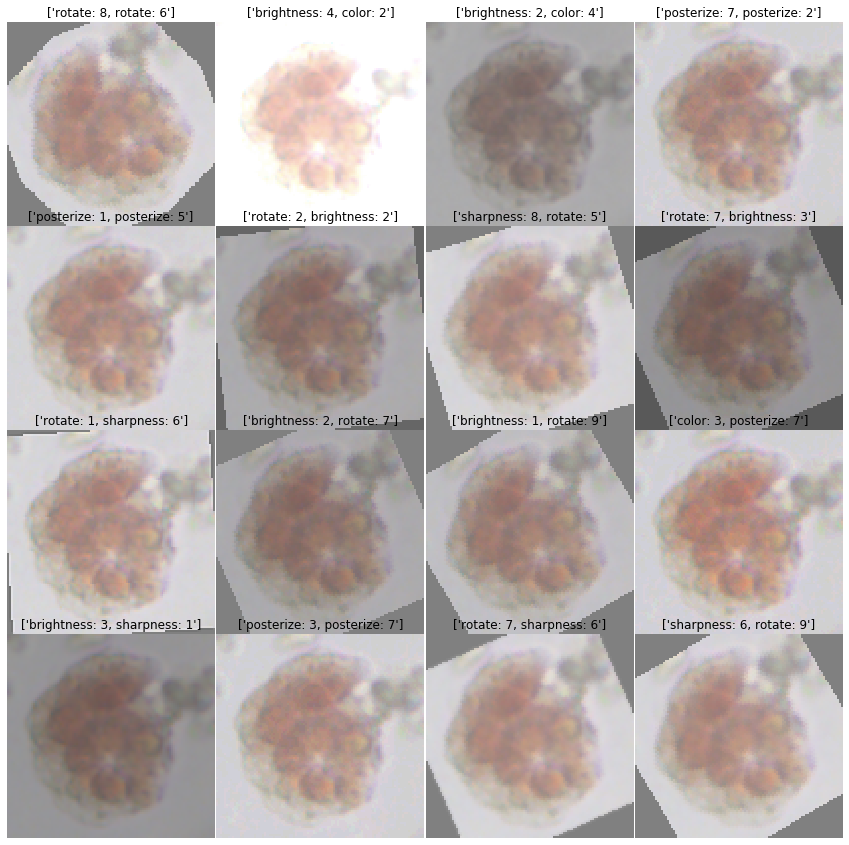

In [197]:
img = 'real_islets_resized/1.tif'
#img = cv2.imread(img)
print(img)
img = Image.open(img)
print(img)

def show_sixteen(images, titles=0):
    f, axarr = plt.subplots(4, 4, figsize=(15, 15), gridspec_kw={"wspace": 0, "hspace": 0})
    for idx, ax in enumerate(f.axes):
        ax.imshow(images[idx])
        ax.axis("off")
        if titles: ax.set_title(titles[idx])
    plt.show()

transformations = ['rotate', 'color', 'posterize', 'contrast', 'sharpness', 'brightness']    
    
print(np.random.choice(transformations, 2))
imgs = []
titles = []
for _ in range(16):
    trafo1 = np.random.choice(transformations)
    trafo2 = np.random.choice(transformations)

    if trafo1 == 'color' or trafo1 == 'brightness' or trafo1 == 'contrast': 
        magn1 =  int(np.random.choice(np.linspace(1,4,4)))
    else:
        magn1 = int(np.random.choice(np.linspace(1,9,9)))
    
    if trafo2 == 'color' or trafo2 == 'brightness' or trafo2 == 'contrast': 
        magn2 = int(np.random.choice(np.linspace(1,4,4)))
    else:
        magn2 = int(np.random.choice(np.linspace(1,9,9)))
    
    titles.append(['{}: {}, {}: {}'.format(trafo1, magn1, trafo2, magn2)])
    
    policy = SubPolicy(1,trafo1,magn1,1,trafo2, magn2)
    imgs.append(policy(img))
show_sixteen(imgs, titles)


In [208]:
dataset = glob('real_islets_resized/*')
print(dataset)
transformations = ['rotate', 'color', 'posterize', 'contrast', 'sharpness', 'brightness']    
savenum = 0
i = 1
while i <= 16:
    img = Image.open('real_islets_resized/{}.tif'.format(i))

    for _ in range(20):
        savenum += 1
        trafo1 = np.random.choice(transformations)
        trafo2 = np.random.choice(transformations)

        if trafo1 == 'color' or trafo1 == 'brightness' or trafo1 == 'contrast': 
            magn1 =  int(np.random.choice(np.linspace(1,4,4)))
        else:
            magn1 = int(np.random.choice(np.linspace(1,9,9)))

        if trafo2 == 'color' or trafo2 == 'brightness' or trafo2 == 'contrast': 
            magn2 = int(np.random.choice(np.linspace(1,4,4)))
        else:
            magn2 = int(np.random.choice(np.linspace(1,9,9)))

        policy = SubPolicy(1,trafo1,magn1,1,trafo2, magn2)
        trafo_img = policy(img)
        trafo_img.save('real_islets_augment/{}'.format(str(savenum) + '.png'))
    i += 1

['real_islets_resized\\1.tif', 'real_islets_resized\\10.tif', 'real_islets_resized\\11.tif', 'real_islets_resized\\12.tif', 'real_islets_resized\\13.tif', 'real_islets_resized\\14.tif', 'real_islets_resized\\15.tif', 'real_islets_resized\\16.tif', 'real_islets_resized\\2.tif', 'real_islets_resized\\3.tif', 'real_islets_resized\\4.tif', 'real_islets_resized\\5.tif', 'real_islets_resized\\6.tif', 'real_islets_resized\\7.tif', 'real_islets_resized\\8.tif', 'real_islets_resized\\9.tif']


In [ ]:
print(np.linsp)

In [68]:
print(np.array(SubPolicy(1,'rotate',4, 1, 'rotate', 4)))